# 2.4. Calculus
逼近法就是积分（integral calculus）的起源. 微积分的另一支，微分（differential calculus）被发明出来。 在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。 这种问题在深度学习中是无处不在的。
在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“模型有多糟糕”这个问题的分数, 损失函数的值越低，模型的表现越好。最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。 因此，我们可以将拟合模型的任务分解为两个关键问题：
- 优化（optimization）：用模型拟合观测数据的过程, 优化的目标是调整模型的参数，使损失函数的值尽可能低，也就是说，使模型在训练数据上的预测尽可能准确。
- 泛化（generalization）：训练模型的最终目的是让它在未见过的新数据上表现良好，这就是泛化。简单来说，我们希望模型不仅在训练数据上表现良好，还能在测试数据或实际应用中也能做出准确的预测。

为了帮助读者在后面的章节中更好地理解优化问题和方法， 本节提供了一个非常简短的入门教程，帮助读者快速掌握深度学习中常用的微分知识。

## 2.4.1. Derivatives and Differentiation 导数和微分
我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。 在深度学习中，我们通常选择对于模型参数可微的损失函数。 
简而言之，对于每个参数， 如果我们把这个参数增加或减少一个无穷小的量，可以知道损失会以多快的速度增加或减少
假设我们有一个函数$f$: $R \rightarrow R$，其输入和输出都是标量。如果$f$的导数存在，这个极限被定义为：
$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$
如果$f'(a)$存在，则称$f$在$a$处是可微的 (differentiable)。如果$f$在一个区间内的每个数上都是可微的，则称$f$在该区间上是可微的。如果$f$在一个区间上是可微的，那么$f$在该区间上是连续的。
我们可以将导数$f'(x)$解释为$f(x)$相对于$x$的瞬时（instantaneous）变化率。 所谓的瞬时变化率是基于$x$的变化$h$，且$h$接近0。

- 导数的定义
导数是一个数学概念，用于描述一个函数的变化率。简单来说，导数告诉我们函数在某一点的瞬时变化率，或者说函数值随着输入变化的速度。导数的直观理解是：如果你在某一点上增加或减少一个非常小的量，函数值会以多快的速度增加或减少。

- 导数的定义公式
导数的定义公式如下：
$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} $$

- 公式的含义

  1. 函数 $ f $：
     - $ f $ 是一个从实数到实数的函数，意味着它接受一个实数作为输入，并输出一个实数。

  2. 导数 $ f'(x) $：
     - $ f'(x) $ 表示函数 $ f $ 在点 $ x $ 处的导数，也称为 $ f $ 在点 $ x $ 处的瞬时变化率。

  3. 极限 $ \lim_{h \rightarrow 0} $：
     - 这是一个极限过程，表示我们让 $h$ 变得非常非常小，接近于 0。

  4. 增量$ h$：
     - $h$ 是一个非常小的数，用来表示我们对输入$x$的微小改变。

  5. 差商$\frac{f(x+h) - f(x)}{h}$：
     - 这是$ x$ 增加$h$后函数值的变化率。分子$f(x+h) - f(x)$表示函数值的变化，分母$h$表示输入的变化量。
     - 当$h$趋近于 0 时，这个比值表示函数在$x$点处的瞬时变化率，也就是导数。

- 举例说明
假设我们有一个简单的函数 $f(x) = x^2$，我们来计算它在点 $x = 2$ 处的导数。
  1. 函数 $f(x) = x^2$：
      - 这是一个二次函数，其图像是一条抛物线。
  2. 计算 $f'(2)$：
      - 根据导数的定义，我们计算：$
     f'(x) = \lim_{h \rightarrow 0} \frac{(2+h)^2 - 2^2}{h}
     $
  3. 展开计算：
      - 先展开分子：$(2+h)^2 = 4 + 4h + h^2$ 所以，$f(2+h) - f(2) = 4 + 4h + h^2 - 4 = 4h + h^2$
  4. 代入公式：
      - $f'(2) = \lim_{h \rightarrow 0} \frac{4h + h^2}{h} = \lim_{h \rightarrow 0} (4 + h)$

  5. 取极限：
     - 当 $h$ 趋近于 0 时，$4 + h$ 趋近于 4，因此：$f'(2) = 4$
     - 这意味着，对于函数 $f(x) = x^2$，当 $x = 2$ 时，函数值随输入的变化率是 4。换句话说，在$x = 2$处，函数值以每单位输入增加 4 个单位输出的速度变化。

- 深度学习中的应用
在深度学习中，导数用于计算损失函数相对于模型参数的变化率。这是优化算法的核心步骤，因为通过计算这些导数（梯度），我们可以知道如何调整模型参数以最小化损失函数。例如，在梯度下降算法中，我们使用损失函数的导数来确定每一步的参数更新方向和步幅，以逐步减小损失函数值，从而优化模型。

总结来说，导数是描述函数变化率的重要工具，它在深度学习中用于优化模型参数，使得模型能够更好地拟合训练数据。

为了更好地解释导数，让我们做一个实验。 定义$f(x) = 3x^2 - 4x$，计算$f'(1)$。根据导数的定义，我们得到：

In [3]:
%matplotlib inline
from matplotlib_inline import backend_inline
from mxnet import np, npx

npx.set_np()


def f(x):
    return 3 * x ** 2 - 4 * x


def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h


h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


通过令$x=1$和, 并让$h$接近0，$\frac{f(x+h) - f(x)}{h}$ 的数值结果接近2

让我们熟悉一下导数的几个等价符号。 给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的：
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x)$$
其中符号$\frac{d}{dx}$和$D$是微分运算符，表示微分操作。我们可以使用这些符号之一来表示函数$f$关于$x$的导数。
我们可以使用以下规则来对常见函数求微分：
- 对于任何常数$C$（$C$是一个标量）, $DC = 0$
- $Dx^n = nx^{n-1}$ (幂定律 (power rule），$n$是任意实数)
- $D\exp(x) = \exp(x)$
- $D\log(x) = 1/x$
- $D\sin(x) = \cos(x)$
- $D\cos(x) = -\sin(x)$


为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。 假设函数$f$和$g$是可微的，$C$是一个常数，我们有：
$$
\begin{aligned} 
\frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \textrm{Constant multiple rule 常数相乘法则} \\ 
\frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \textrm{Sum rule 加法法则} \\ 
\frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \textrm{Product rule 乘法法则} \\ 
\frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \textrm{Quotient rule 除法法则} 
\end{aligned}
$$

现在我们可以应用上述几个法则来计算导数。 例如，假设$f(x) = 3x^2 - 4x$，我们可以使用幂定律和常数相乘法则来计算$f$的导数。 
首先，$D(3x^2) = 3 \cdot 2 x^{2-1} = 6x$ 和 $D(-4x) = -4$。 因此，根据加法法则，$D(3x^2 - 4x) = 6x - 4$。
令$x=1$，得到$6 \times 1 - 4 = 2$。 因此，根据导数的定义，当$x=1$时，函数$f(x) = 3x^2 - 4x$的导数是2。此导数也是曲线$y=3x^2 - 4x$在$x=1$处切线的斜率。

为了对导数的这种解释进行可视化，我们将使用matplotlib， 这是一个Python中流行的绘图库。 要配置matplotlib生成图形的属性，我们需要定义几个函数。 在下面，use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像。

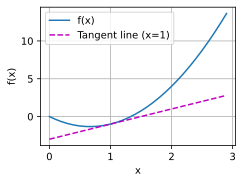

In [4]:
from tools_func import *

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.4.2. Partial Derivatives 偏导数
到目前为止，我们只讨论了仅含一个变量的函数的微分。 在深度学习中，函数通常依赖于许多变量。 
因此，我们需要将微分的思想推广到多元函数（multivariate function）上。 这就涉及到偏导数（partial derivative）的概念。
设$y = f(x_1, x_2, \ldots, x_n)$是一个具有个变量的函数。$y$关于第$i$个参数$x_i$的偏导数是：
$$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_i + h, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}$$
为了计算$\frac{\partial y}{\partial x_i}$，我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数， 并计算$y$关于$x$的导数。对于偏导数的表示，以下是等价的：
$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f$$

偏导数的例子
假设我们有一个函数 $ f(x, y) = x^2 + xy + y^2 $。我们来计算这个函数对 $ x $ 和 $ y $ 的偏导数。
1. 关于 $x$ 的偏导数, 即 $x$ 增加一个微小的值，对整体函数 $f$ 的变化率是多少：
$$
\frac{\partial f}{\partial x} = \lim_{h \rightarrow 0} \frac{f(x + h, y) - f(x, y)}{h} 
$$

  - 计算步骤如下：
$$
f(x + h, y) = (x + h)^2 + (x + h)y + y^2 = x^2 + 2xh + h^2 + xy + hy + y^2 
$$
$$
f(x, y) = x^2 + xy + y^2 
$$

  - 因此：
$$
\frac{\partial f}{\partial x} = \lim_{h \rightarrow 0} \frac{x^2 + 2xh + h^2 + xy + hy + y^2 - (x^2 + xy + y^2)}{h} 
$$
$$
= \lim_{h \rightarrow 0} \frac{2xh + h^2 + hy}{h} 
$$
$$
= \lim_{h \rightarrow 0} (2x + h + y) 
$$

  - 当 $h$ 趋近于 0 时，我们得到：
$$
\frac{\partial f}{\partial x} = 2x + y 
$$

2. 关于 $y$ 的偏导数, 即 $y$ 增加一个微小的值，对整体函数 $f$ 的变化率是多少：
$$
\frac{\partial f}{\partial y} = \lim_{h \rightarrow 0} \frac{f(x, y + h) - f(x, y)}{h} 
$$

  - 计算步骤如下：
$$
f(x, y + h) = x^2 + x(y + h) + (y + h)^2 = x^2 + xy + xh + y^2 + 2yh + h^2 
$$
$$
f(x, y) = x^2 + xy + y^2 
$$

  - 因此：
$$
\frac{\partial f}{\partial y} = \lim_{h \rightarrow 0} \frac{x^2 + xy + xh + y^2 + 2yh + h^2 - (x^2 + xy + y^2)}{h} 
$$
$$
= \lim_{h \rightarrow 0} \frac{xh + 2yh + h^2}{h} 
$$
$$ 
= \lim_{h \rightarrow 0} (x + 2y + h) 
$$

  - 当 $h$ 趋近于 0 时，我们得到：
$$
\frac{\partial f}{\partial y} = x + 2y 
$$


## 2.4.3. Gradients 梯度
在多变量函数中，偏导数描述了函数对其中一个变量的变化率，而其他变量保持不变。梯度（gradient）则是一个向量，由所有偏导数组成，描述了函数在某一点的变化趋势和方向。梯度向量的每个分量就是函数对相应变量的偏导数。我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。 
具体而言，设函数$f: R^n \rightarrow R$是一个多变量函数, 其输入是一个$n$维向量$\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$关于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量：
$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
   \partial_{x_n} f(\mathbf{x})\right]^\top$$
或写作:$$\ \nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top$$
其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。


例子：二元函数的梯度

假设我们有一个二元函数 $ f(x, y) = x^2 + xy + y^2 $。我们来计算这个函数的梯度。

1. 计算偏导数：
  - 对 $x$ 的偏导数：
$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2 + xy + y^2) = 2x + y
$$

  - 对 $y$ 的偏导数：
$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2 + xy + y^2) = x + 2y
$$

2. 构造梯度向量：
$$
\nabla f(x, y) = \left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right]^\top = \left[2x + y, x + 2y\right]^\top
$$

  - 所以，函数 $f(x, y) = x^2 + xy + y^2$ 的梯度向量是：
$$
\nabla f(x, y) = \begin{pmatrix}
2x + y \\
x + 2y
\end{pmatrix}
$$

梯度的意义

梯度向量 $\nabla f(x, y)$ 在几何上表示函数 $f$ 在点 $(x, y)$ 处的最陡上升方向。梯度向量的方向是函数值增加最快的方向，其长度表示函数值增加的速率。

假设$\mathbf{x}$是一个$n$维向量, 在微分多元函数时经常使用以下规则:
1. 对于任何常数矩阵$A \in R^{n \times n}$，有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
  - 这是一个线性变换的梯度。对向量 $\mathbf{x}$ 进行线性变换得到的新向量 $\mathbf{A} \mathbf{x}$，其梯度是 $\mathbf{A}$ 的转置。
  - 举例, 设 $\mathbf{x} \in \mathbb{R}^3$ 和矩阵 $\mathbf{A} = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{pmatrix}$，则：$\nabla_{\mathbf{x}} (\mathbf{A} \mathbf{x}) = \begin{pmatrix}1 & 4 & 7 \\ 2 & 5 & 8 \\ 3 & 6 & 9\end{pmatrix}$
2. 对于任何常数矩阵$A \in R^{n \times n}$，有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} =\mathbf{A}$
  - 这里的 $\mathbf{x}^\top \mathbf{A}$ 是一个行向量。对行向量的梯度是矩阵 $\mathbf{A}$ 本身。
  - 举例, 设 $\mathbf{x} \in \mathbb{R}^3$ 和矩阵 $\mathbf{A} = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{pmatrix}$，则： $\nabla_{\mathbf{x}} (\mathbf{x}^\top \mathbf{A}) = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{pmatrix}$
3. 对于任何常数矩阵$A \in R^{n \times n}$，有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top) \mathbf{x}$
  - 这是一个二次型的梯度，二次型表示为 $\mathbf{x}^\top \mathbf{A} \mathbf{x}$。其梯度是 $\mathbf{A}$ 与 $\mathbf{A}^\top$ 之和，再乘以向量 $\mathbf{x}$。
  - 举例, 设 $\mathbf{x} \in \mathbb{R}^2$ 和矩阵 $\mathbf{A} = \begin{pmatrix}1 & 2 \\ 3 & 4\end{pmatrix}$，则：$\mathbf{A} + \mathbf{A}^\top = \begin{pmatrix}1 & 3 \\ 2 & 4\end{pmatrix} + \begin{pmatrix}1 & 2 \\ 3 & 4\end{pmatrix} = \begin{pmatrix}2 & 5 \\ 5 & 8\end{pmatrix}$ 所以，梯度是：$
\nabla_{\mathbf{x}} (\mathbf{x}^\top \mathbf{A} \mathbf{x}) = \begin{pmatrix}2 & 5 \\ 5 & 8\end{pmatrix} \mathbf{x}$
4. $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$ 
  - 这里的 $\|\mathbf{x}\|^2$ 是向量 $\mathbf{x}$ 的二范数的平方，也可以表示为 $\mathbf{x}^\top \mathbf{x}$。其梯度是 $2\mathbf{x}$。
  - 举例, 设 $\mathbf{x} = \begin{pmatrix}x_1 \\ x_2 \\ x_3\end{pmatrix}$，则：$\|\mathbf{x}\|^2 = x_1^2 + x_2^2 + x_3^2$ 对 $\mathbf{x}$ 求偏导数：$\nabla_{\mathbf{x}} \|\mathbf{x}\|^2 = \begin{pmatrix}\frac{\partial (x_1^2 + x_2^2 + x_3^2)}{\partial x_1} \\ \frac{\partial (x_1^2 + x_2^2 + x_3^2)}{\partial x_2} \\ \frac{\partial (x_1^2 + x_2^2 + x_3^2)}{\partial x_3}\end{pmatrix} = \begin{pmatrix}2x_1 \\ 2x_2 \\ 2x_3\end{pmatrix} = 2\mathbf{x}$


## 2.4.4. Chain Rule 链式法则
然而，上面方法可能很难找到梯度。 这是因为在深度学习中，多元函数通常是复合（composite）的， 所以难以应用上述任何规则来微分这些函数。 幸运的是，链式法则可以被用来微分复合函数。
让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则: 
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$$
现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。 假设可微分函数$y$有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$有变量$x_1, x_2, \ldots, x_n$。 注意，$y$是$x_1, x_2, \ldots, x_n$的函数。 
对于任意$1 \leq i \leq m$和$1 \leq j \leq n$，链式法则给出：
$$\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \ \textrm{ and so } \ \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y$$

**偏导数的计算为何难以找到梯度**
- 在深度学习中，计算梯度（即偏导数）变得复杂，因为模型通常涉及许多层和非线性变换。这些复合函数的复杂性使得直接应用简单的微分规则变得困难。
- 举例说明
    - 设我们有一个简单的神经网络，其输出 $y$ 取决于输入 $x$ 和权重 $w$：$y = f(g(h(x, w), w), w)$
    - 这里 $h$、$g$ 和 $f$ 都是非线性函数，而每一层的输出又作为下一层的输入。因此，直接微分 $y$ 对 $x$ 和 $w$ 是非常复杂的，因为每一层的输出都依赖于前一层的输出和参数。

**链式法则的解释**
- 链式法则（Chain Rule）提供了一种系统的方法来微分复合函数。它允许我们通过逐步计算每一层的导数，将复杂的微分问题分解为多个简单的微分问题。
- 单变量情况下的链式法则
    - 假设我们有两个可微函数 $y = f(u)$ 和 $u = g(x)$，根据链式法则：$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$
- 多变量情况下的链式法则
    - 设函数 $y$ 依赖于多个中间变量 $u_1, u_2, \ldots, u_m$，而这些中间变量又依赖于 $x_1, x_2, \ldots, x_n$。根据链式法则，对于任意 $i$ 和 $j$：$\frac{\partial y}{\partial x_i} = \sum_{k=1}^{m} \frac{\partial y}{\partial u_k} \cdot \frac{\partial u_k}{\partial x_i}$
    - 这意味着总导数是每个路径导数的乘积的和。
- 链式法则允许我们通过计算每一层的偏导数并将它们组合起来，逐层求解复杂的复合函数的梯度。
    - 假设我们有一个简单的两层神经网络：第一层： $u = h(x, w_1)$; 第二层： $y = g(u, w_2)$
    - 我们想要计算 $y$ 关于 $x$ 的梯度。根据链式法则：$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x}$
    - 首先计算每一层的偏导数：
        - 对第二层的输出 $y$：$\frac{\partial y}{\partial u} = g'(u, w_2)$
        - 对第一层的输出 $u$：$\frac{\partial u}{\partial x} = h'(x, w_1)$
    - 然后将这些偏导数组合起来：
        - $ \frac{\partial y}{\partial x} = g'(u, w_2) \cdot h'(x, w_1)$
        - 这里，$g'(u, w_2)$ 表示对第二层的输出 $y$ 的偏导数，$h'(x, w_1)$ 表示对第一层的输出 $u$ 的偏导数。

2.4.5. Discussion 小节
微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。
导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。
梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。
链式法则可以用来微分复合函数。

2.4.6. Exercises

1.  So far we took the rules for derivatives for granted. Using the definition and limits prove the properties for 
    1. $f(x) = c$
    2. $f(x) = x^n$
    3. $f(x) = e^x$ 
    4. $f(x) = \log x$
2.  In the same vein, prove the product, sum, and quotient rule from first principles.
3.  Prove that the constant multiple rule follows as a special case of the product rule.
4.  Calculate the derivative of $f(x) = x^x$.
5.  What does it mean that $f'(x) = 0$ for some $x$? Give an example of a function $f$ and a location $x$ for which this might hold.
6.  Plot the function $y = f(x) = x^3 - \frac{1}{x}$ and plot its tangent line at $x = 1$.
7.  Find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.
8.  What is the gradient of the function $f(\mathbf{x}) = \|\mathbf{x}\|_2$? What happens for $\mathbf{x} = \mathbf{0}$?
9.  Can you write out the chain rule for the case where $u = f(x, y, z)$ and $x = x(a, b)$, $y = y(a, b)$, and $z = z(a, b)$?
10. Given a function $f(x)$ that is invertible, compute the derivative of its inverse $f^{-1}(x)$. Here we have that $f^{-1}(f(x)) = x$ and conversely $f(f^{-1}(y)) = y$.
    Hint: use these properties in your derivation.